# CMSC478 Machine Learning - Fall 2020

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-2: Multi-Class Classification Using Random Forests and SVM</font>

*DYLAN ZACH || SY45690* 

## Overview and Learning Objectives

In Assignment-2, you're going to build on the skills you developed in Assignment-1, and extend them on a relatively larger dataset of video games and their ratings as predicted value.

As discussed in the lectures, multi-class classification means your model classifies multiple (more than two) classes/labels. You are going to build classifiers that can predict video game ratings.

<b>Note:</b> Read ALL the instructions in this notebook very carefully. Careless reading and skipping lines would be a major source of making mistakes and losing points in your assignments. Some outputs have been shared while some others have not been shared intentionally. You may NOT share the outputs, the code, and the answers in Piazza.

Pedagogically, this assignment will help you:
- better understand the concepts you learned and how to use ML models in practice. 
- practice reading documentation. This is a very important skill in AI/ML/Data Science collaborative environments and teams.

So, let's get started!

## Part I - Preprocessing

The description of the dataset you're going to work on can be seen [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). You are going to use the features to predict video game rating - `Rating` column.

You can download the dataset directly from [here](https://github.com/fereydoonvafaei/CMSC478-Fall2020/blob/master/data/video-games.csv).

Follow the instructions for loading the data, preprocessing, training and testing carefully. You can enter your code in the areas with elipsis `...` notation.

## <font color="red"> Required Coding

In [7]:
# Import all the necessary modules from python and sklearn
# You may start with pandas, numpy and matplotlib,
# and keep adding the necessary modules here as you move forward
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load the data as a dataframe using pandas
game_data = pd.read_csv('video-games.csv')

print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop NAs
game_data.dropna(inplace=True)
game_data.shape

print(game_data.shape)
game_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [10]:
# Drop "Name" column as it does not provide any useful info
game_data.drop(['Name'], axis=1, inplace = True)

print(game_data.shape)
game_data.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [11]:
# Drop "Global_Sales" column as it is a redundant feature - it's just sum of regional and other sales
game_data.drop(['Global_Sales'], axis = 1, inplace = True)

print(game_data.shape)
game_data.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [12]:
# Get feature vector X (all columns but "Rating") and target label y as "Rating"
X = game_data.drop(['Rating'], axis=1)
y = game_data['Rating']

> You can resort the row indices but it's not necessary.

In [13]:
# Print X shape and head
print(X.shape)
X.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo


> Since some of the features are categorical, we need to convert them to numerical. One common technique is One-Hot Encoding which creates dummy variables. You can see some simple examples of one-hot encoding [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [14]:
# Using pandas.get_dummies() create dummy variables for categorical features (needs 1 line of code only)
X = pd.get_dummies(X)

print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,2006.0,41.36,28.96,3.77,8.45,76.0,51.0,322.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,82.0,73.0,709.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,80.0,73.0,192.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,11.28,9.14,6.50,2.88,89.0,65.0,431.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,13.96,9.18,2.93,2.84,58.0,41.0,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Print y shape and head and its unique values
print(y.shape)
print(y.unique())
y.head()

(6825,)
['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']


0    E
2    E
3    E
6    E
7    E
Name: Rating, dtype: object

> You must convert your categorical labels/classes to numerical from 0 to 6. In Assignment-1, you used scikit-learn to do it. Here is another useful technique provided to you using `map` and `lambda` for conversion and the output type will be preserved as pandas series. NOTE: Your ourput should precisely match with the provided output.

In [16]:
# Convert categorical class labels to numerical
y = y.map(lambda x: {'E' :0, 'E10+' :1, 'T' :2, 'M' :3, 'AO' :4, 'K-A' :5, 'RP' :6}.get(x))

print(y.unique())
print(y.shape)
print(type(y))
y.head()

[0 3 2 1 4 5 6]
(6825,)
<class 'pandas.core.series.Series'>


0    0
2    0
3    0
6    0
7    0
Name: Rating, dtype: int64

> <b>Note:</b> The output of the following cell is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and can be verified by this output.

In [17]:
# Normalize X using mean() and std()  NOTE: The output is provided for your reference.
X = (X - X.mean())/ (X.std())

print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,-0.341176,42.346639,41.790569,12.886767,31.004904,0.413014,1.147975,0.250716,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
2,0.133743,15.800856,18.221103,12.956315,11.884655,0.845647,2.292368,0.909519,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
3,0.371202,15.728496,15.558627,11.182831,10.624793,0.701436,2.292368,0.029412,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
6,-0.341176,11.252514,12.954346,22.380122,10.365410,1.350385,1.876225,0.436270,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
7,-0.341176,14.022868,13.012543,9.965734,10.217191,-0.884885,0.627797,-0.077835,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105


In [18]:
# Split the data to train and test with ratio of 80/20 for train/test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5460, 1677)
(5460,)
(1365, 1677)
(1365,)


## Part II - Multi-Class Classification Using Random Forests

Next, you're going to build classifiers. Some classifiers like [Random Forests in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) can directly be applied on multi-class classification, so let's try RF first.

You may start with default hyperparameters, but you should definitely fine-tune them as described in the following cell to achieve at least 0.65 for mean cv score. Your cv score should use `accuracy` as its metric. Also notice that - as discussed in the lectures - you must apply `cross_val_score` on the whole dataset (not just on training or testing set). You may see the full documentation of `cross_val_score` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

> Note: Depending on the speed of your computer and the hyperparameter values you choose, running this cell may take a few minutes.

In [13]:
# Create a RandomForestClassifier - You may start with default hyperparameters,
# but you should fine-tune them to achieve at least 0.65 for mean cv score
rf_clf = RandomForestClassifier()

In [14]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
kfolds = KFold(n_splits = 10)
rf_cv_score_arr = []

for train_index, test_index in kfolds.split(X, y):
    new_rf_clf = clone(rf_clf)

    new_rf_clf.fit(X.iloc[train_index, :], y.iloc[train_index])
    correct_fold = new_rf_clf.score(X.iloc[test_index, :], y.iloc[test_index])
    rf_cv_score_arr.append(correct_fold)
    
rf_cv_score = pd.DataFrame(rf_cv_score_arr)
print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0    0.705015
dtype: float64


> Next, you're going to fine-tune your rf classifier based on `n_estimators` hyperparameter. Depending on your computer speed, this may take a long time. Read the comments in the following cell, and plot the impact of n_estimators on mean cv scores. To make it a bit faster, you're going to change cv to 5-fold. cv `scoring` will still be `accuracy`.

[0.5137, 0.511648, 0.557363, 0.576264, 0.567912, 0.592674, 0.608791, 0.626227, 0.618901, 0.626813, 0.633407, 0.632234, 0.63956, 0.644835, 0.64293, 0.64337, 0.652894, 0.658608, 0.656264, 0.662564, 0.658755, 0.655092, 0.66696, 0.671355, 0.661099, 0.670476, 0.661392, 0.664762, 0.660659, 0.669304, 0.668571, 0.668718, 0.670183, 0.668571, 0.665201, 0.67326, 0.671941, 0.671795, 0.667985, 0.67033, 0.6737, 0.678388, 0.67707, 0.682784, 0.671795, 0.679707, 0.679414, 0.676337, 0.677216, 0.682198, 0.671648, 0.676337, 0.687326, 0.675165, 0.681612, 0.682784, 0.678388, 0.685714, 0.678828, 0.677509, 0.678535, 0.681319, 0.681758, 0.679121, 0.68, 0.675751, 0.680733, 0.676484, 0.674579, 0.682491, 0.68381, 0.681905, 0.677509, 0.681172, 0.68293, 0.687179, 0.68044, 0.682344, 0.67619, 0.685275, 0.684249, 0.682198, 0.683956, 0.681905, 0.678681, 0.684982, 0.681026, 0.684835, 0.686154, 0.686886, 0.678828, 0.685128, 0.688498, 0.687179, 0.684982, 0.692015, 0.68674, 0.681758, 0.688205]


(1.0, 100.0)

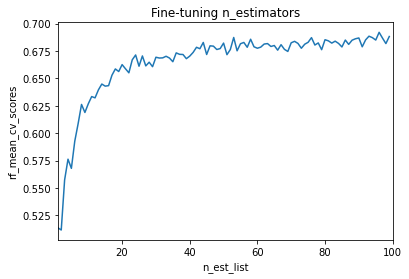

In [15]:
# Now fine-tune n_estimators hyperparameter as follows:

# 1- Write a for loop that iterates over n_estimators from 1 to 100
# 2- In each iteration, do 5-fold cv and calculate rf_cv_score.mean()
# and append it to the list rf_mean_cv_scores
# 3- Finally, plot rf_mean_cv_scores on y-axis versus n_est_list on x-axis
# Your plot should have title "Fine-tuning n_estimators", and label for each axis
# Incomplete plots will get ZERO credit!

# NOTE: Depending on your computer speed, running this may take well more than an hour or even several hours!

rf_mean_cv_scores = []
n_est_list = range(1, 100)

for i in n_est_list:
    kfolds = KFold(n_splits = 5)
    rf_cv_score_arr = []

    for train_index, test_index in kfolds.split(X, y):
        new_rf_clf = RandomForestClassifier(n_estimators = i)

        new_rf_clf.fit(X.iloc[train_index, :], y.iloc[train_index])
        correct_fold = new_rf_clf.score(X.iloc[test_index, :], y.iloc[test_index])
        rf_cv_score_arr.append(correct_fold)
        
    rf_cv_score = pd.DataFrame(rf_cv_score_arr)
    rf_mean_cv_scores.append(round(rf_cv_score.mean().loc[0], 6))
    
print(rf_mean_cv_scores)

plt.title('Fine-tuning n_estimators')

plt.plot(n_est_list, rf_mean_cv_scores)
plt.ylabel('rf_mean_cv_scores')
plt.xlabel('n_est_list')
plt.xlim([1, 100])


In [16]:
# Fit the rf_clf on the training set
rf_clf = RandomForestClassifier(n_estimators = int(rf_mean_cv_scores.index(max(rf_mean_cv_scores)) + 1))
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=96)

In [17]:
# Get feature_importances of rf for all features
for name, score in zip(game_data, rf_clf.feature_importances_):
    print(name, score)

Platform 0.043441552907405485
Year_of_Release 0.04111422437724611
Genre 0.03812343866637887
Publisher 0.020382730939155793
NA_Sales 0.030505502024979928
EU_Sales 0.04341231116557628
JP_Sales 0.05356099451582369
Other_Sales 0.06360864611570721
Critic_Score 0.0028634243593120543
Critic_Count 0.0002015298642124777
User_Score 0.010192697915647994
User_Count 0.005578301614571378
Developer 0.0033885036306765663
Rating 0.005145543440400414


In [18]:
# Make predictions on test set
y_pred = rf_clf.predict(X_test)

In [19]:
# Get classification report # Note: You must import the related module from sklearn to run this cell!
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       404
           1       0.63      0.44      0.52       179
           2       0.64      0.73      0.68       490
           3       0.79      0.63      0.70       291
           5       0.00      0.00      0.00         1

    accuracy                           0.69      1365
   macro avg       0.56      0.52      0.53      1365
weighted avg       0.70      0.69      0.69      1365



### Part II Questions

Answer the following question HERE:

Q1 [3 points] - According to `feature_importance` of rf classifier, (which works based on the average impurity reduction of the feature across all trees of the forest) what are the most important features in predicting Rating? Name top five.

*The features with the highest scores - and thus deemed most important - were Other_Sales, JP_Sales, Platform, EU_Sales, and Year_of_Release. I'm surprised that Genre didn't place higher, but if I had to guess, it might've been due to the addition of dummy variables for the different classification parameters - where most of the parameters are just below 0 most of the time anyways.*

Q2 [2 points]- According to your plot, what is the best range for n_estimators?

*The absolute best n_estimators value was 96, according to the above fine-tuning session. However, the graph seems to suggest that there is an asymptote of performance gains such that most of the values around n_est = 96 perform basically as well. I'd say that above n_est = 20, score is consistently expected to be 0.65 or greater - not too different from ~0.69 of n_est = 96.*

Q3 [3 points] - According to the classification report of rf classifier, which classes are relatively easier to classify? Compare different metrics of each class label that you see in the classification report.

*What I find interesting is that the worst performer out of all of them (Ignoring the one K-A entry {5}) was classifying the E10 {1} rating. Out of all of the classifications, it had the lowest precision, recall, and f1-score - meaning that it was harder for the model to distinguish the features that characterized an E10-rating game above all others. This kind of makes sense, as in the video game world E10 games often share many similarities with E-rated games (and to a lesser extent, T {2}) E-rated games {0}, on the other hand, had a very high recall in the model - meaning that the majority of all E-rated games in the test set were correctly identified. This implies that E-rated games have strong attributes which idenify them within the set. Conversely, M-rated games {3} had the highest precision rate out of the set - meaning that most entries the model flagged as "M" it did so correctly.*

## Part III - Multi-Class Classification Using SVM and Kernels

In Part III, you're going to use SVM and kernels for multi-class classification.

To use [SVM implementation from scikit-learn](https://scikit-learn.org/stable/modules/svm.html#multi-class-classification), you need to use OvO or OvR strategies.

Remember from the lectures that SVM can be linear or non-linear using kernels. [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) is the implementation of SVM for the case of a linear kernel.

Note that [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) does not accept keyword kernel, as this is assumed to be linear. It implements OvR multi-class strategy and uses it by default, thus training n_class models and the runtime is usually less than OvO strategy although for this dataset, it may still take a few minutes to run.

## <font color="red"> Required Coding

In [19]:
# Build a linear SVM - You may start with default hyperparameters,
# but you should fine-tune them to get at least 0.65 for mean cv score

lin_svm_clf = svm.LinearSVC()

In [20]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset

kfolds = KFold(n_splits = 10)
rf_cv_score_arr = []

for train_index, test_index in kfolds.split(X, y):
    new_svm_clf = clone(lin_svm_clf)

    new_svm_clf.fit(X.iloc[train_index, :], y.iloc[train_index])
    correct_fold = new_svm_clf.score(X.iloc[test_index, :], y.iloc[test_index])
    rf_cv_score_arr.append(correct_fold)
    
lin_svm_cv_score = pd.DataFrame(rf_cv_score_arr)

print("Mean cv Score - Linear SVM: ", lin_svm_cv_score.mean())

Mean cv Score - Linear SVM:  0    0.680411
dtype: float64


[0.660073, 0.651429, 0.641465, 0.637363, 0.634725, 0.633114, 0.638828, 0.638095, 0.626667, 0.626081, 0.616264, 0.625055, 0.621245, 0.625201, 0.624029, 0.611429, 0.622271, 0.625201, 0.624029, 0.621392, 0.622564, 0.615238, 0.618901, 0.621538, 0.62359, 0.622857, 0.616703, 0.62022, 0.616557, 0.620366, 0.610696, 0.622125, 0.618608, 0.620513, 0.622418, 0.618022, 0.611575, 0.624908, 0.623004, 0.619927, 0.613773, 0.615678, 0.624176, 0.620952, 0.622857, 0.628718, 0.619927, 0.622418, 0.617289, 0.615238, 0.611868, 0.615971, 0.620806, 0.615092, 0.614066, 0.624029, 0.616703, 0.614359, 0.608205, 0.61304, 0.617289, 0.612894, 0.608059, 0.621099, 0.606447, 0.623883, 0.615824, 0.612015, 0.615531, 0.622857, 0.616996, 0.615092, 0.609377, 0.622711, 0.616996, 0.618022, 0.620806, 0.619341, 0.614212, 0.617289, 0.615531, 0.625788, 0.613919, 0.616557, 0.619341, 0.618608, 0.615531, 0.607766, 0.615531, 0.609084, 0.614359, 0.618022, 0.624029, 0.615092, 0.62359, 0.621685, 0.609817, 0.613773, 0.619634]


Ellipsis

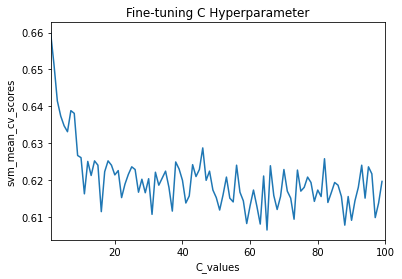

In [21]:
# Now fine-tune C hyperparameter as follows:

# 1- Write a for loop that iterates over C from 1 to 100
# 2- In each iteration, do 5-fold cv and calculate lin_svm_cv_score.mean()
# and append it to the list svm_mean_cv_scores
# 3- Finally, plot svm_mean_cv_scores on y-axis versus C_values on x-axis
# Your plot should have title "Fine-tuning C Hyperparameter", and label for each axis
# Incomplete plots will get ZERO credit!

# NOTE: Depending on your computer speed, running this may take several hours!

svm_mean_cv_scores = []
C_values = range(1, 100)

for i in C_values:
    kfolds = KFold(n_splits = 5)
    svm_cv_score_arr = []

    for train_index, test_index in kfolds.split(X, y):
        new_svm_clf = svm.LinearSVC(C = i)

        new_svm_clf.fit(X.iloc[train_index, :], y.iloc[train_index])
        correct_fold = new_svm_clf.score(X.iloc[test_index, :], y.iloc[test_index])
        svm_cv_score_arr.append(correct_fold)
        
    svm_cv_score = pd.DataFrame(svm_cv_score_arr)
    svm_mean_cv_scores.append(round(svm_cv_score.mean().loc[0], 6))
    
print(svm_mean_cv_scores)

plt.title('Fine-tuning C Hyperparameter')

plt.plot(C_values, svm_mean_cv_scores)
plt.ylabel('svm_mean_cv_scores')
plt.xlabel('C_values')
plt.xlim([1, 100])

...

> Now, let's try [kernel svm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on this problem. Fine-tune C hyperparameter with at least 3 values {1, 10, 100}.

In [22]:
# Build a kernel svm with rbf kernel
# Note: You should specify ovo strategy, see the example in documentation section 1.4.1.1 in the link below
# https://scikit-learn.org/stable/modules/svm.html#multi-class-classification
rbf_svm_clf = svm.SVC(kernel='rbf', decision_function_shape='ovo')

In [26]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset

# I wasn't sure what you meant specifically by "Fine-tune C hyperparameter", esp. with the given outline.
# Was that kind of a dangling requirement, glossed over in writing the assignment? Regardless...
# I rewrote the given code to output mean scores for 3 C hyperparameter settings with 10 fold cross vald.
svm_mean_cv_scores = []
C_values = {1, 10, 100}

for i in C_values:
    kfolds = KFold(n_splits = 10)
    svm_cv_score_arr = []

    for train_index, test_index in kfolds.split(X, y):
        new_svm_clf = svm.SVC(kernel='rbf', decision_function_shape='ovo', C=i)

        new_svm_clf.fit(X.iloc[train_index, :], y.iloc[train_index])
        correct_fold = new_svm_clf.score(X.iloc[test_index, :], y.iloc[test_index])
        rbf_svm_score_arr.append(correct_fold)

    rbf_svm_cv_score = pd.DataFrame(rbf_svm_score_arr)
    svm_mean_cv_scores.append(round(rbf_svm_cv_score.mean().loc[0], 6))
    
print("Mean cv Score - Kernel SVM -RBF: C = {1, 10, 100}, resp.")
print(svm_mean_cv_scores)

Mean cv Score - Kernel SVM -RBF: C = {1, 10, 100}, resp.
[0.659168, 0.671425, 0.676931]


In [27]:
# Build a kernel svm with polynomial kernel
poly_svm_clf = svm.SVC(kernel='poly', decision_function_shape='ovo')

In [28]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset

# Ditto.
svm_mean_cv_scores = []
C_values = {1, 10, 100}

for i in C_values:
    kfolds = KFold(n_splits = 10)
    poly_svm_score_arr = []

    for train_index, test_index in kfolds.split(X, y):
        new_svm_clf = svm.SVC(kernel='poly', decision_function_shape='ovo', C=i)

        new_svm_clf.fit(X.iloc[train_index, :], y.iloc[train_index])
        correct_fold = new_svm_clf.score(X.iloc[test_index, :], y.iloc[test_index])
        poly_svm_score_arr.append(correct_fold)

    poly_svm_cv_score = pd.DataFrame(poly_svm_score_arr)
    svm_mean_cv_scores.append(round(poly_svm_cv_score.mean().loc[0], 6))
    
print("Mean cv Score - Kernel SVM -Poly: C = {1, 10, 100}, resp.")
print(svm_mean_cv_scores)

Mean cv Score - Kernel SVM -Poly: C = {1, 10, 100}, resp.
[0.440321, 0.570093, 0.618727]


### Part III Questions

Anwser the following question HERE:

Q1 [2 points] - According to the plot, what is the best range of values for C hyperparameter of linear SVM?

*For linear SVM, it seems like the model works best when the C hyperparameter value is very low, near 1. Above C=10, the mean score seems to hover around ~0.615, which is consistently lower than 0.66 for C=1.*

Q2 [2 points] - Acording to your experiments, which non-linear kernel worked better on this dataset? Was it better to use linear svm or kernel svm on this dataset?

*Surprisingly, the highest mean score was achieved by the non-linear kernel RBF SVM model. (C=10 on RBF performed better than linear at any C, whereas C=1 on RBF was only slightly lower performing than C=1 on linear.) And unlike linear SVM, both of the kernel SVMs seemed to experience better performance as the C hyperparameter value increased. Although the Poly kernel SVM model saw the most marked change in score in relation to the C hyperparameter value, it performed worse overall compared to both RBF kernel and linear SVM.*

## Grading

Assignment-2 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I preprocessing: 10 points (if you don't get the correct X and y, all the following parts would be wrong, your whole assignment will get no credit!)

- Part II Random Forests - 40 points
    - Implementation and training: 12 points
    - Fine-tuning plot: 20 points
    - Questions: 8 points

- Part III SVM and Kernels - 50 points
    - Implementation and training: 26 points
    - Fine-tuning C plot: 20 points
    - Questions: 4 points

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A2.ipynb```. Submit the completed notebook using the ```Assignment-2``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Friday October 16th, 11:59PM.</b></font>